## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import roc_auc_score, make_scorer,roc_curve
import warnings
warnings.filterwarnings("ignore")


## **1**. **Exploratory data analysis**

In [2]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# df = pd.read_csv('/home/dl_content/creditcard.csv')
df = pd.read_csv('/home/creditcard.csv')

print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [ ]:
df.shape

(284807, 31)

In [ ]:
# Print data types of each column
print(df.dtypes)

# Get a summary of numerical features
print(df.describe())

df.info()

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.2037

Here we will observe the distribution of our classes

In [ ]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
print(f'Out of {df["Class"].count()} transactions, {round(normal_share,2)}% of them are normal and {round(fraud_share,2)}% are fraudulent.')

Out of 284807 transactions, 99.83% of them are normal and 0.17% are fraudulent.


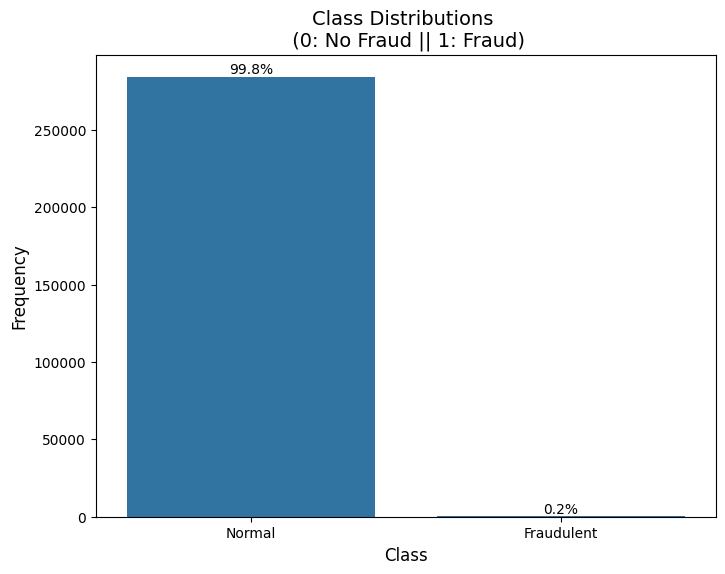

In [ ]:

# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transactions
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.xticks(range(2), ['Normal', 'Fraudulent'])
plt.xlabel('Class', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add percentage labels to the bars
for p in plt.gca().patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height / df.shape[0])
    x = p.get_x() + p.get_width() / 2
    y = height
    plt.gca().annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10)

plt.show()

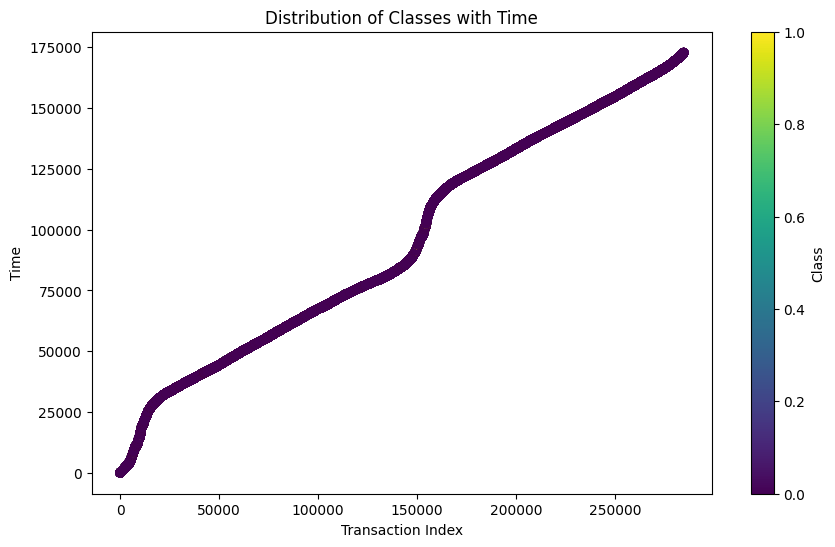

In [ ]:
# Create a scatter plot to observe the distribution of classes with time

plt.figure(figsize=(10,6))
plt.scatter(df.index, df['Time'], c=df['Class'])
plt.xlabel("Transaction Index")
plt.ylabel("Time")
plt.title("Distribution of Classes with Time")
plt.colorbar(label="Class")
plt.show()


### Observations:
There is no visible pattern or cluster of fraudulent transactions in the color gradient, indicating that fraudulent transactions don't occur at a specific time.

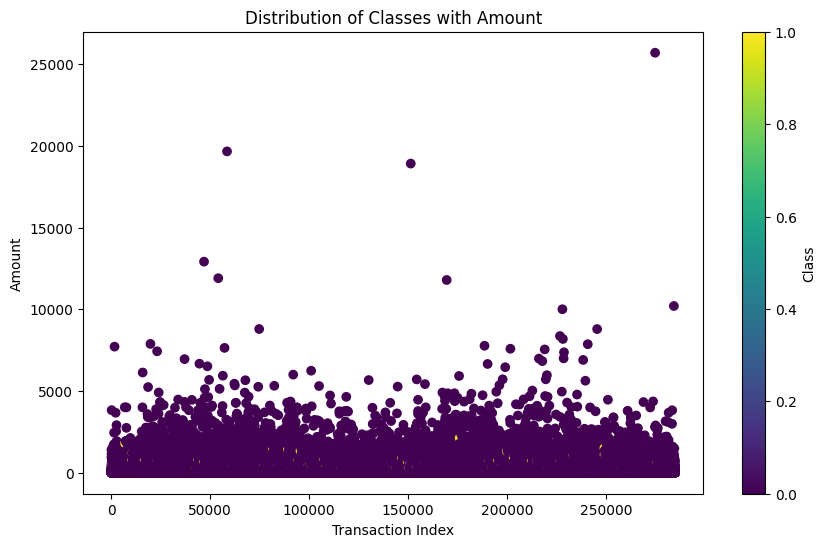

In [ ]:
# Create a scatter plot to observe the distribution of classes with Amount

plt.figure(figsize=(10,6))
plt.scatter(df.index, df['Amount'], c=df['Class'])
plt.xlabel("Transaction Index")
plt.ylabel("Amount")
plt.title("Distribution of Classes with Amount")
plt.colorbar(label="Class")
plt.show()

### Observations:

The plot shows that fraudulent transactions fall within the same range as non-fraudulent ones, with no visible clusters. Additionally, there are some transactions with very high amounts that appear as outliers and need to be removed

In [4]:
# select rows with amount > 15000 and count them

# Select rows where 'Amount' is greater than 15000
selected_rows = df[df['Amount'] > 15000]

# Count the number of selected rows
row_count = len(selected_rows)

print(f"Number of rows with Amount > 15000: {row_count}")
selected_rows

Number of rows with Amount > 15000: 3


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
58465,48401.0,-36.802320,-63.344698,-20.645794,16.715537,-20.672064,7.694002,24.956587,-4.730111,-2.687312,...,11.455313,-10.933144,-17.173665,1.180700,-7.025783,-2.534330,-3.602479,3.450224,19656.53,0
151296,95286.0,-34.549296,-60.464618,-21.340854,16.875344,-19.229075,6.335259,24.422716,-4.964566,0.188912,...,11.502580,-9.499423,-16.513186,0.744341,-7.081325,-2.604551,-3.550963,3.250802,18910.00,0
274771,166198.0,-35.548539,-31.850484,-48.325589,15.304184,-113.743307,73.301626,120.589494,-27.347360,-3.872425,...,-21.620120,5.712303,-1.581098,4.584549,4.554683,3.415636,31.612198,-15.430084,25691.16,0


In [5]:
# Assuming 'selected_rows' DataFrame is already defined as in the previous code.

# Create a new DataFrame without the selected rows
df_new = df.drop(selected_rows.index)

# Display the new DataFrame
df_new

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [6]:
df_no_duplicates = df_new.drop_duplicates()

print(f"Original DataFrame shape: {df_new.shape}")
print(f"DataFrame shape after removing duplicates: {df_no_duplicates.shape}")

Original DataFrame shape: (284804, 31)
DataFrame shape after removing duplicates: (283723, 31)


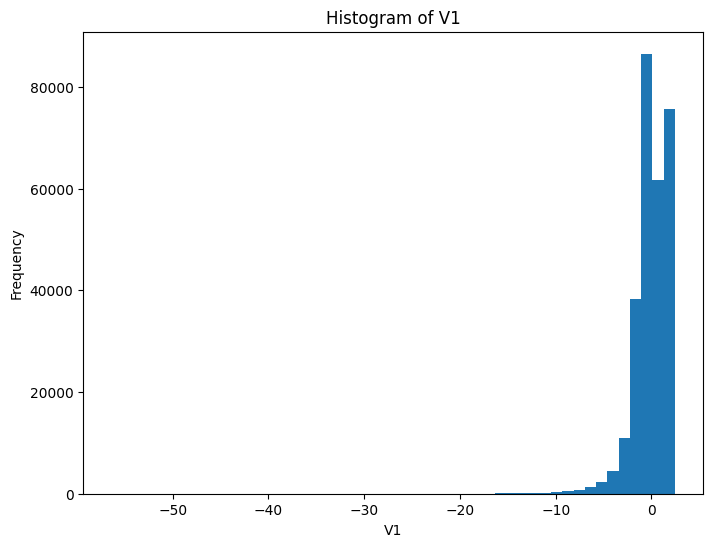

Skewness of V1: -3.2260594465464227


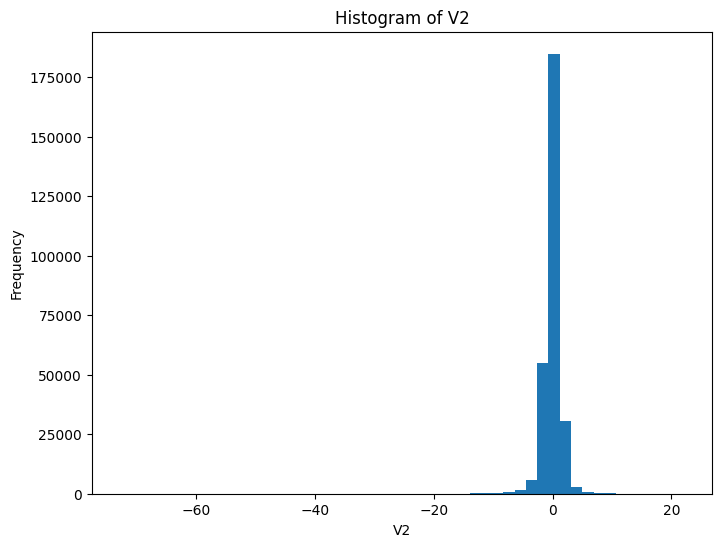

Skewness of V2: -4.369319968798238


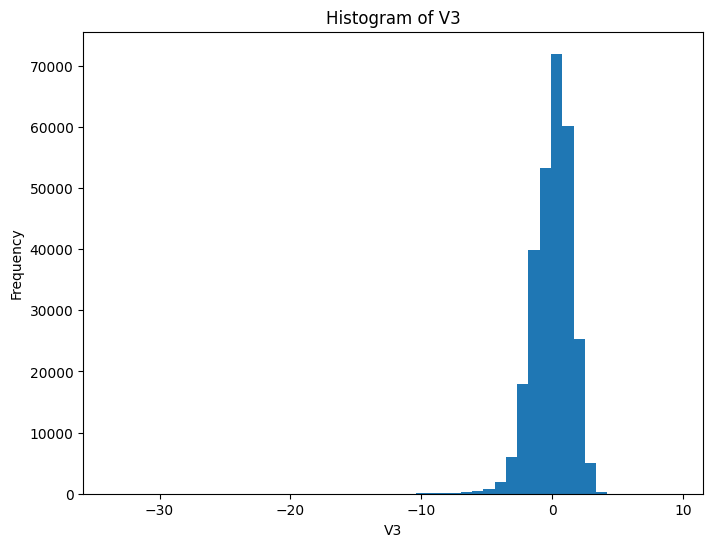

Skewness of V3: -2.032905197353114


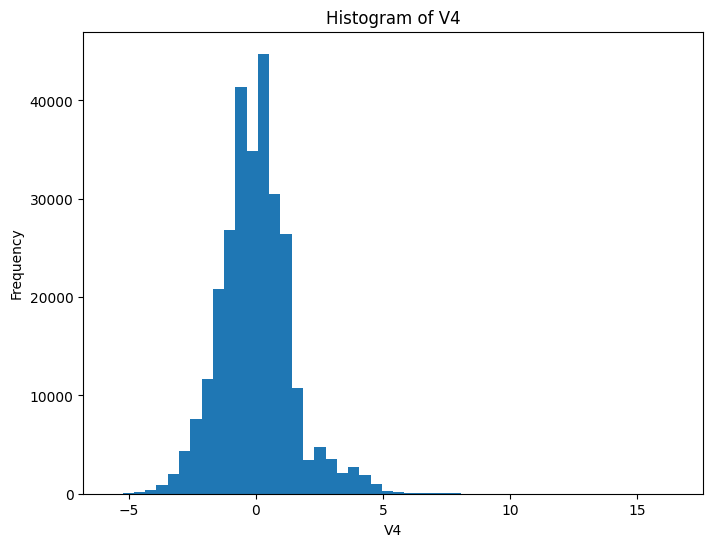

Skewness of V4: 0.65696388692592


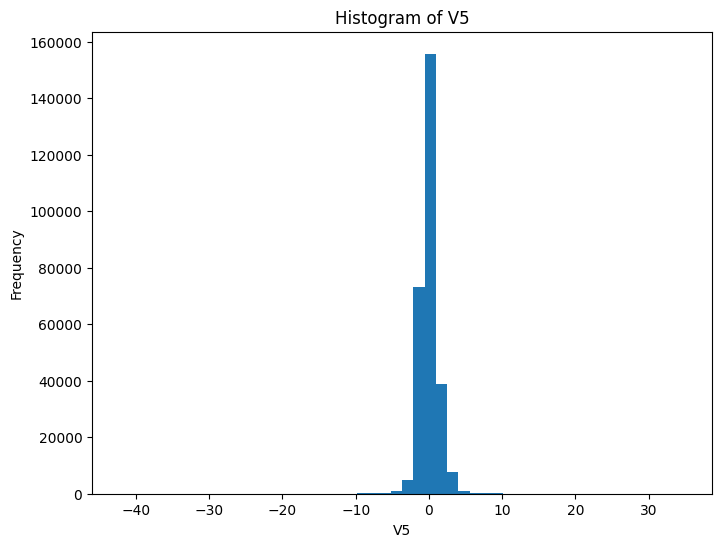

Skewness of V5: -0.42327618517959187


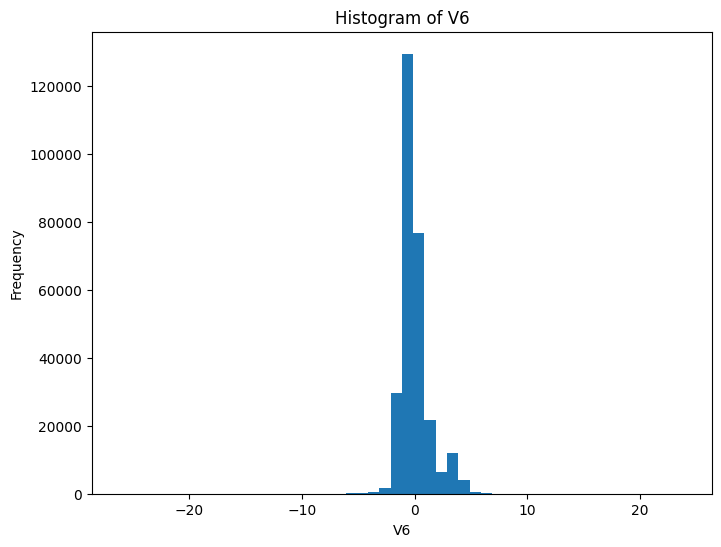

Skewness of V6: 1.2625094691216243


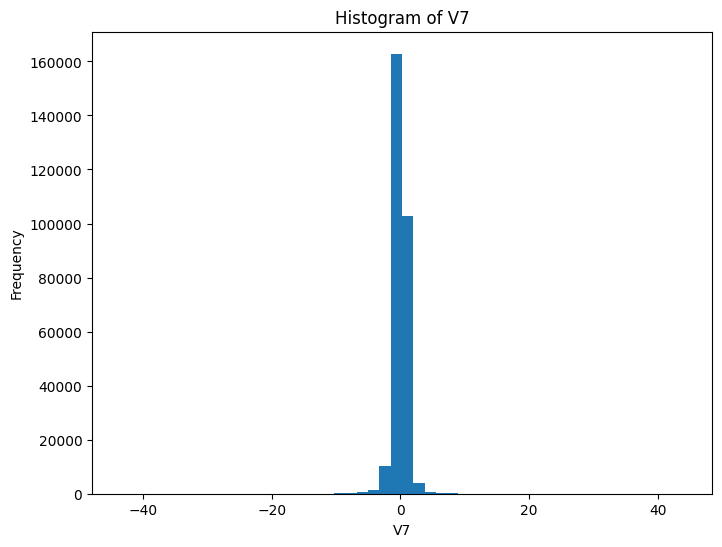

Skewness of V7: -0.5352001400359424


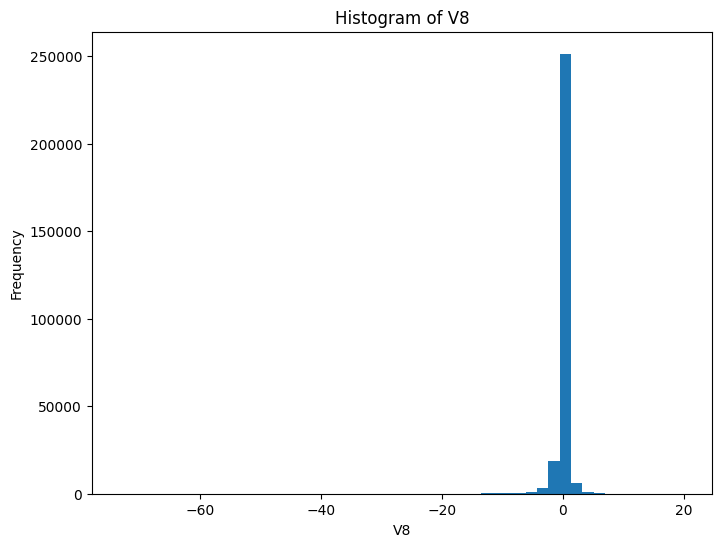

Skewness of V8: -8.291800253229951


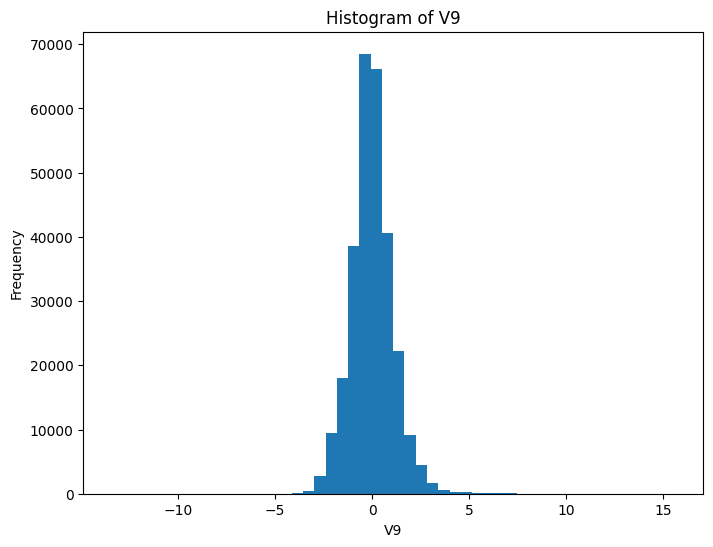

Skewness of V9: 0.5378560046655629


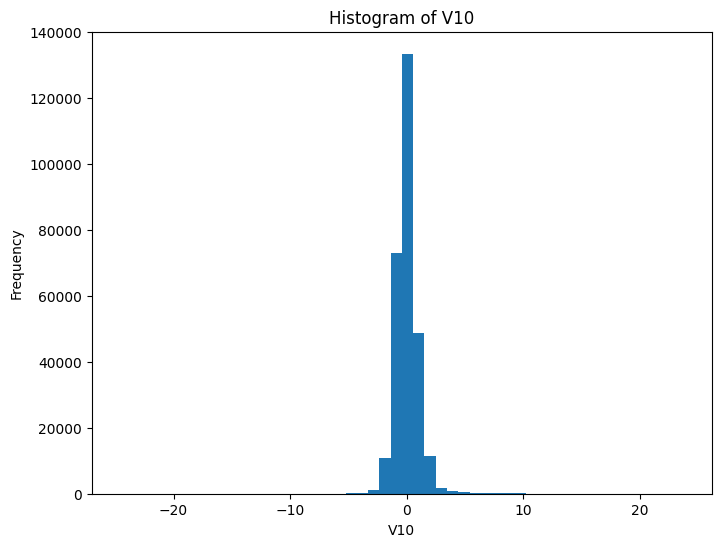

Skewness of V10: 1.2629350301204005


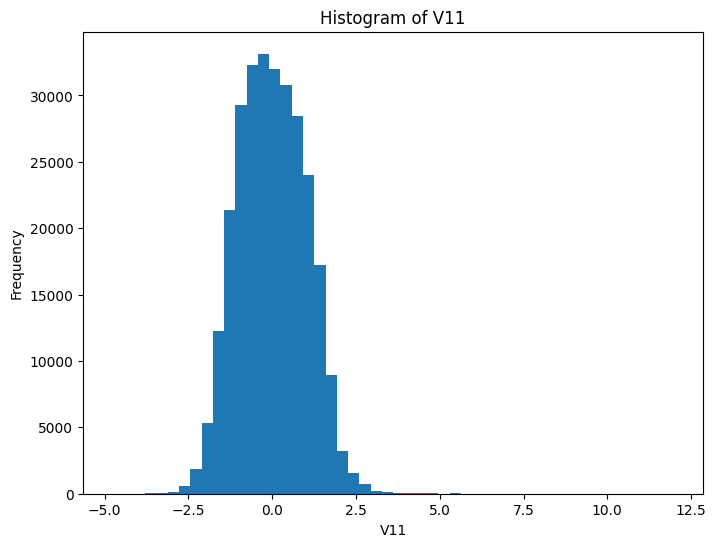

Skewness of V11: 0.3431588706421579


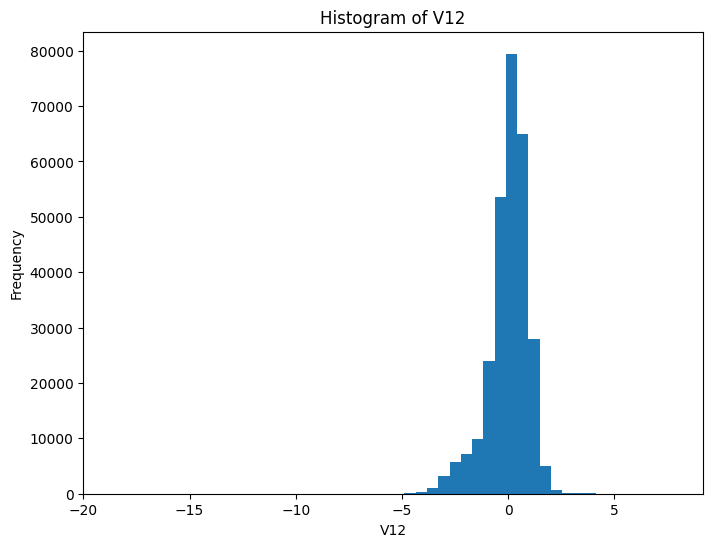

Skewness of V12: -2.1973836157459923


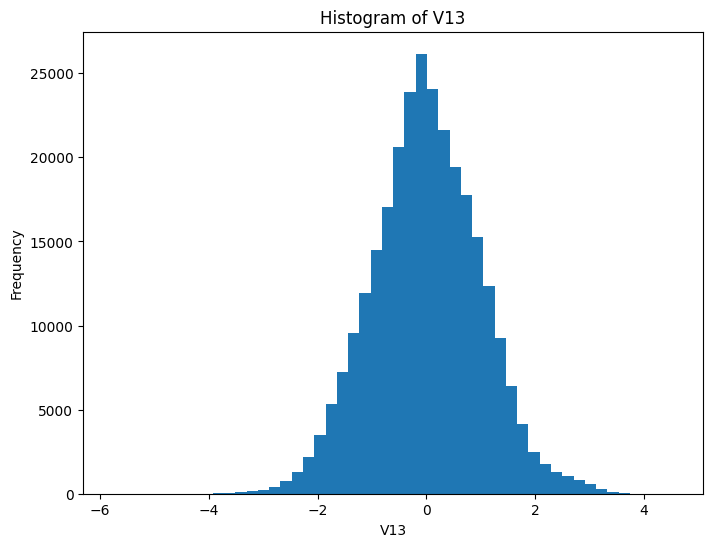

Skewness of V13: 0.06283842065497831


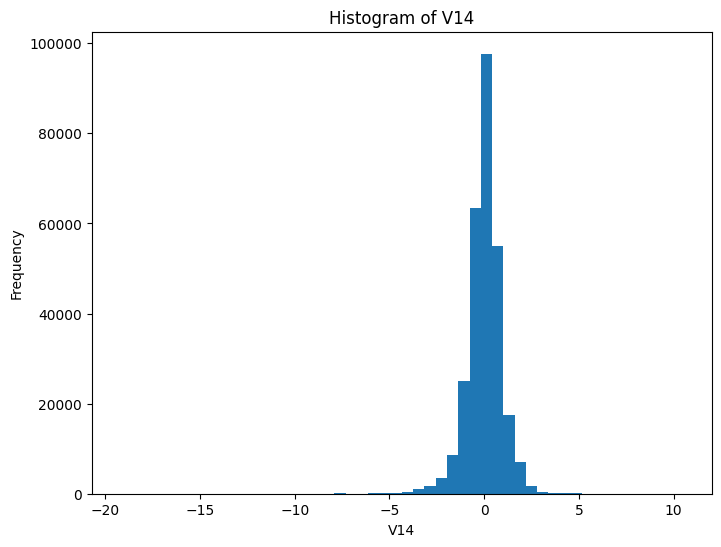

Skewness of V14: -1.9197251745773145


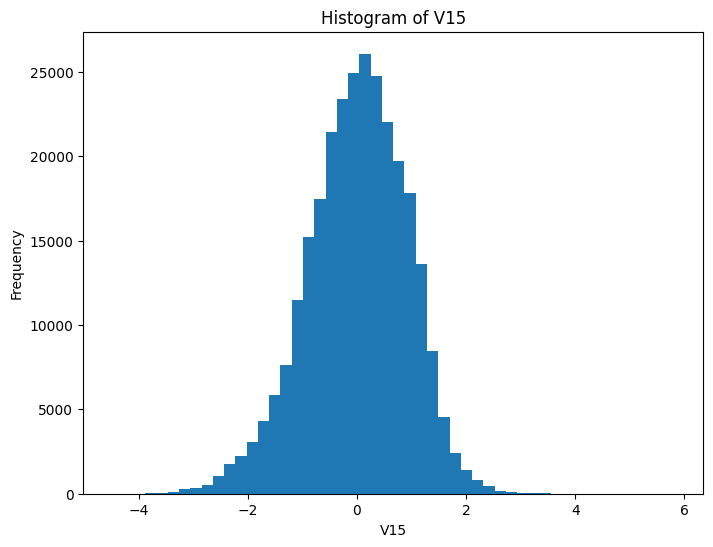

Skewness of V15: -0.31299111122628404


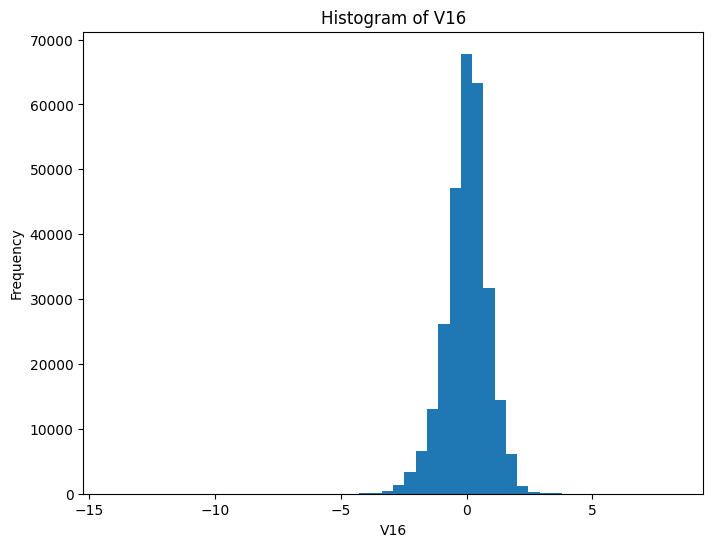

Skewness of V16: -1.0807900628475828


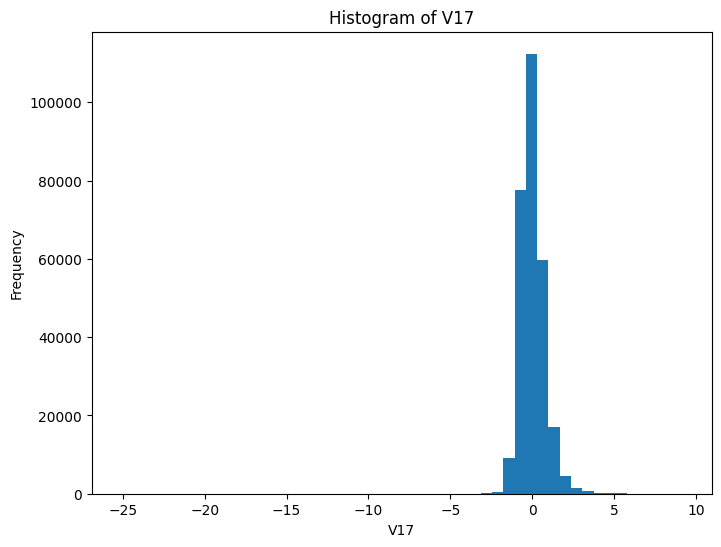

Skewness of V17: -3.6898038489627027


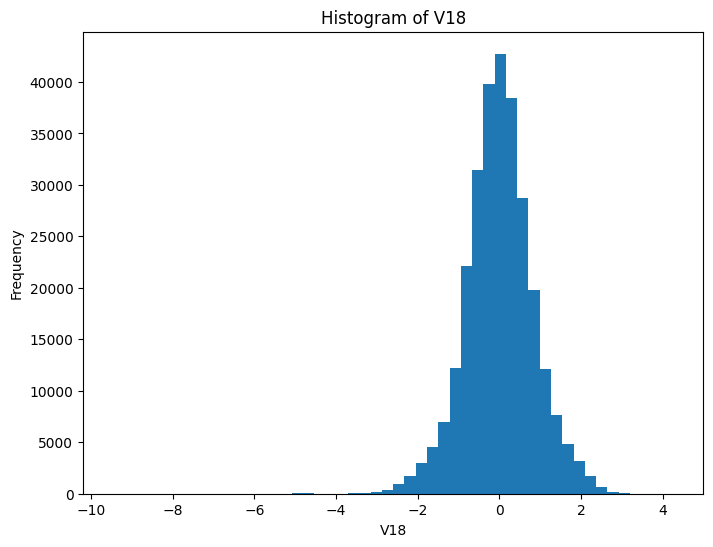

Skewness of V18: -0.25000756580307165


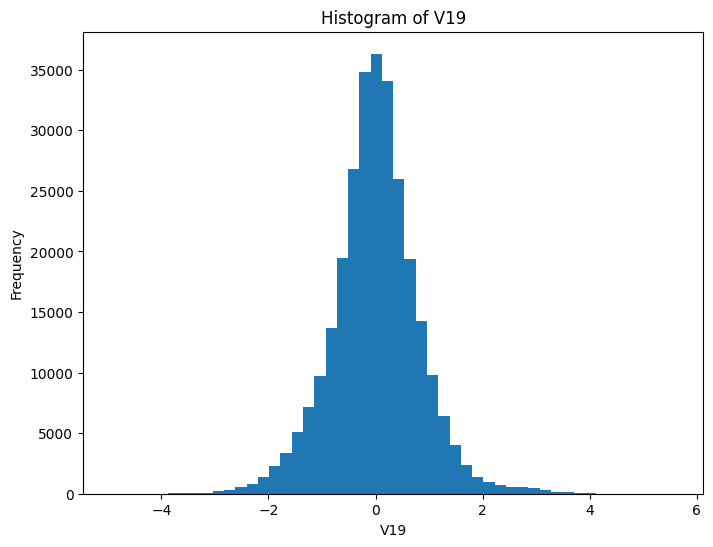

Skewness of V19: 0.11186961149548066


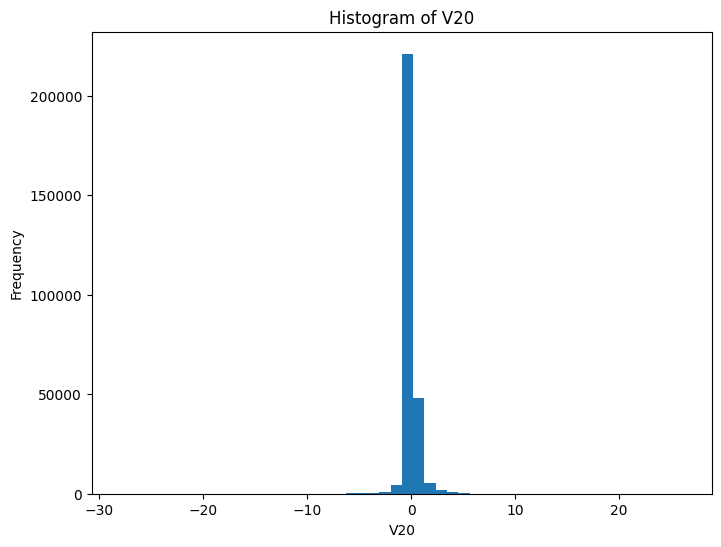

Skewness of V20: -1.788116269316555


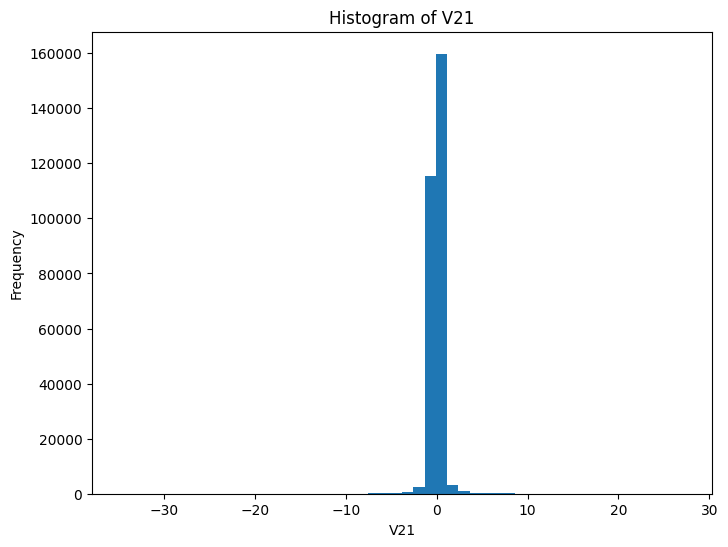

Skewness of V21: 2.907212806314046


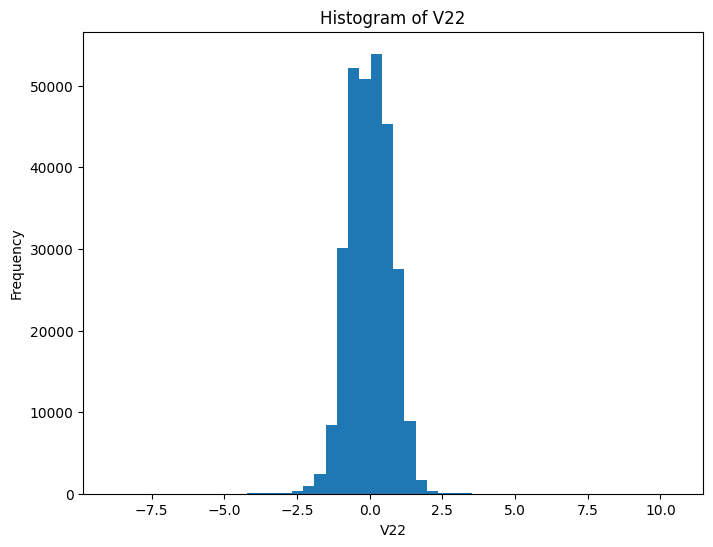

Skewness of V22: -0.164618563441513


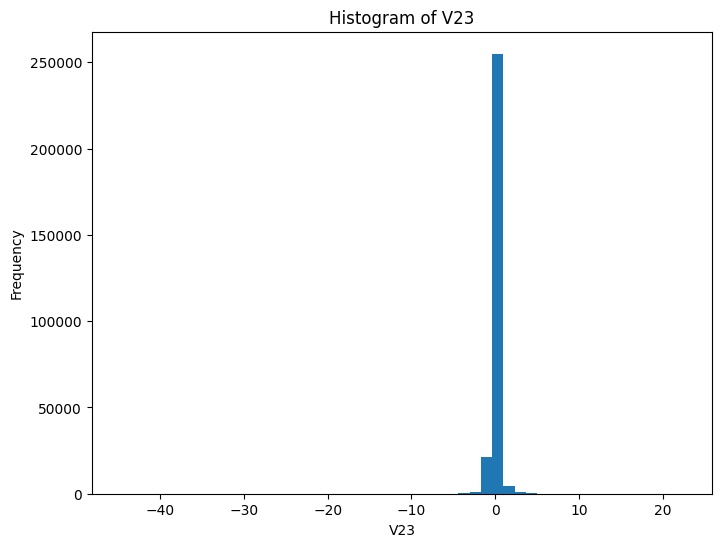

Skewness of V23: -5.773376353111212


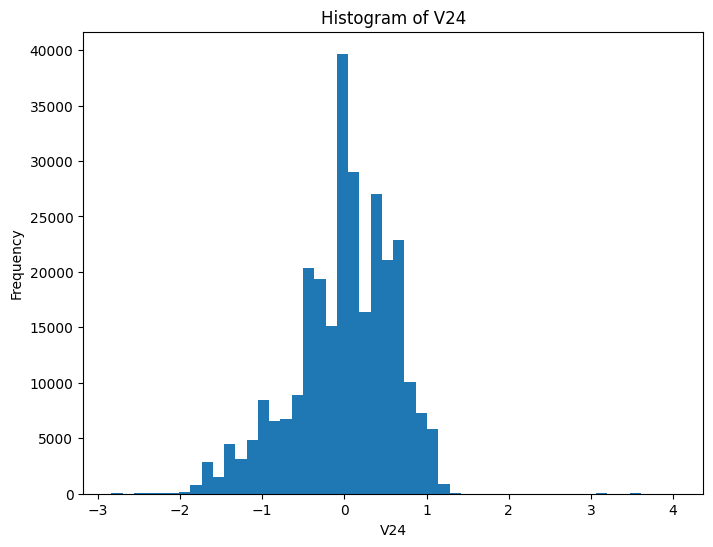

Skewness of V24: -0.5537543774427384


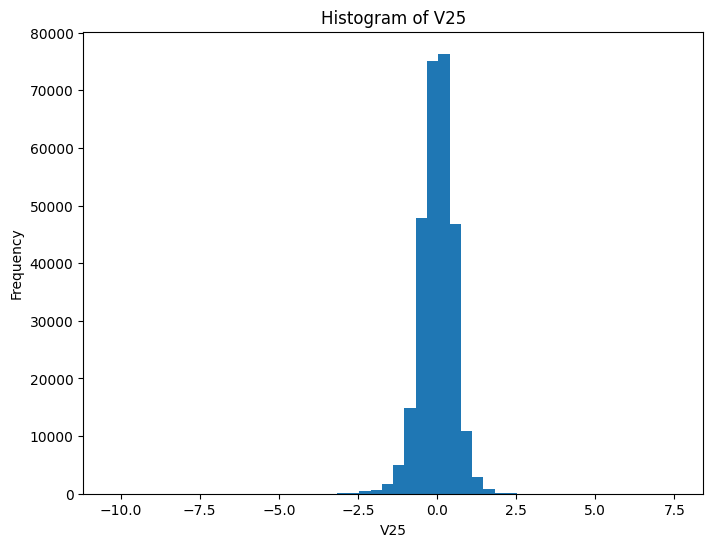

Skewness of V25: -0.401755916531129


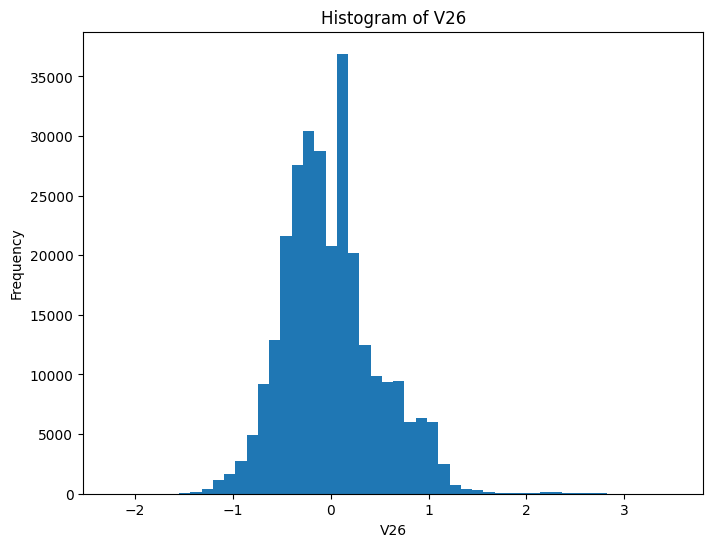

Skewness of V26: 0.5803914276125951


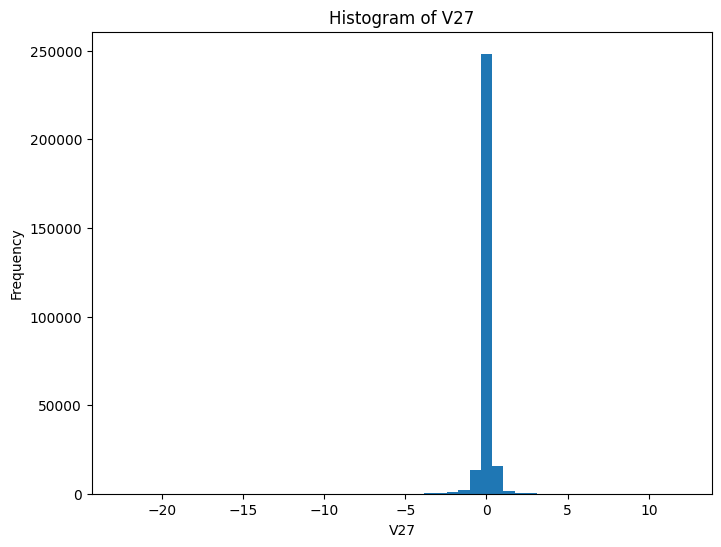

Skewness of V27: -2.6347468731158274


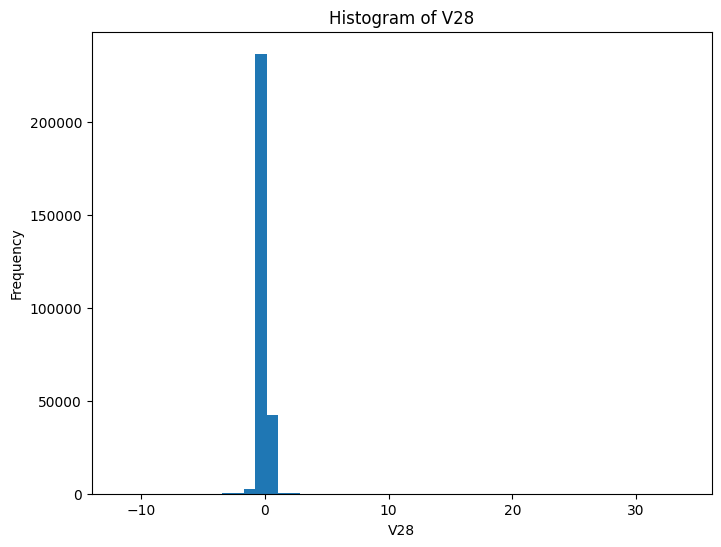

Skewness of V28: 12.068241300734906


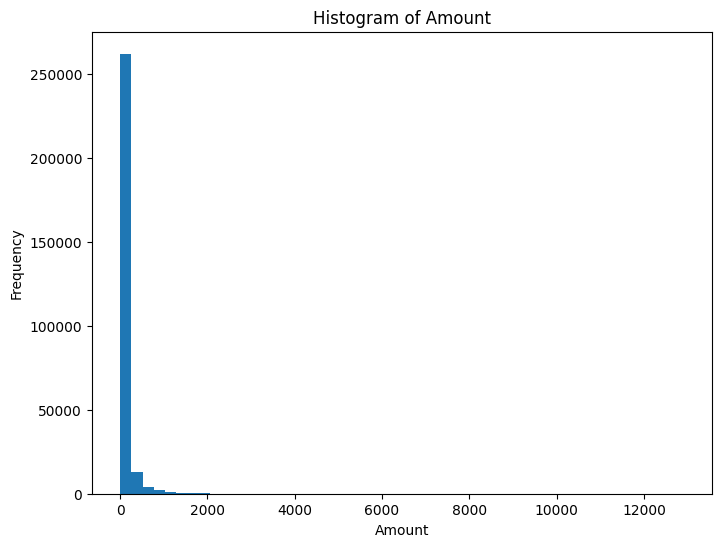

Skewness of Amount: 11.339926605195261


In [ ]:
# plot histograms if each column except time and also calculate skewness coefficient

from scipy.stats import skew

# Iterate over columns except 'Time' and 'Class'
for col in df_no_duplicates.columns:
  if col not in ['Time', 'Class']:
    plt.figure(figsize=(8, 6))
    plt.hist(df_no_duplicates[col], bins=50)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.show()

    # Calculate skewness
    skewness = skew(df_no_duplicates[col])
    print(f'Skewness of {col}: {skewness}')

In [ ]:
# find correlation between amount and v28

correlation = df_no_duplicates['Amount'].corr(df_no_duplicates['V28'])
print(f"Correlation between Amount and V28: {correlation}")

Correlation between Amount and V28: 0.02256835429890723


### Scaling the features

In [7]:
from sklearn.preprocessing import StandardScaler

X = df_no_duplicates.drop(['Class','Time'], axis=1)  # Features
y = df_no_duplicates['Class']  # Target variable

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Feature ranking:
1. feature V17 (0.17131599003593412)
2. feature V14 (0.12401010091436386)
3. feature V12 (0.1068799835948307)
4. feature V10 (0.10537314483299372)
5. feature V11 (0.07867441056488543)
6. feature V16 (0.04902222443475406)
7. feature V9 (0.03645878005953226)
8. feature V18 (0.029735548849402056)
9. feature V4 (0.0277500822701918)
10. feature V7 (0.02701878397362668)
11. feature V3 (0.019186180553071416)
12. feature V26 (0.019066944296335993)
13. feature V6 (0.015750601716186412)
14. feature V21 (0.01520193701810271)
15. feature V1 (0.014644722296323574)
16. feature V27 (0.0133880589871125)
17. feature V8 (0.01303820983910972)
18. feature V28 (0.012762739820331133)
19. feature V5 (0.012455602268493165)
20. feature V2 (0.012273462638642539)
21. feature V19 (0.012150171114833557)
22. feature V20 (0.012108971321055637)
23. feature V15 (0.01168521857849667)
24. feature V24 (0.011591393486400833)
25. feature Amount (0.011110291001940963)
26. feature V13 (0.010816484015367396)


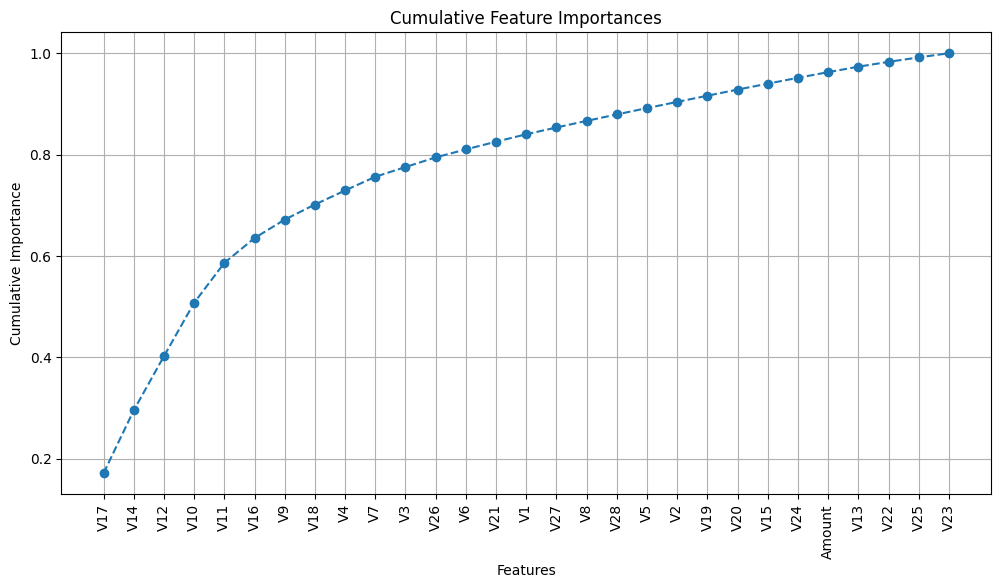

In [ ]:
# write code for feature selection using random forrest

from sklearn.ensemble import RandomForestClassifier

# Initialize RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=100) # You can adjust n_estimators

# Fit the classifier to your scaled data
rf_classifier.fit(X_scaled, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Get the indices of the features sorted by importance
indices = np.argsort(feature_importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print(f"{f+1}. feature {X.columns[indices[f]]} ({feature_importances[indices[f]]})")


# Calculate cumulative importances
cumulative_importances = np.cumsum(feature_importances[indices])

# Plot cumulative importances
plt.figure(figsize=(12, 6))
plt.title("Cumulative Feature Importances")
plt.plot(range(len(cumulative_importances)), cumulative_importances, marker='o', linestyle='--')
plt.xticks(range(len(cumulative_importances)), [X.columns[index] for index in indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Cumulative Importance")
plt.grid(True)
plt.show()




### Observation

For a highly imbalanced class dataset, removing features based solely on this plot might not be the most effective approach. Here's why:

**Imbalanced Data**: In imbalanced datasets, models tend to focus on the majority class and neglect the minority class. Feature importance scores can be biased towards the majority class, leading to the removal of features that might be crucial for identifying the minority class.

**Model Performance**: The primary goal is to improve model performance on the minority class. Simply removing features based on cumulative importance might not guarantee better performance, especially if important features for the minority class are removed.

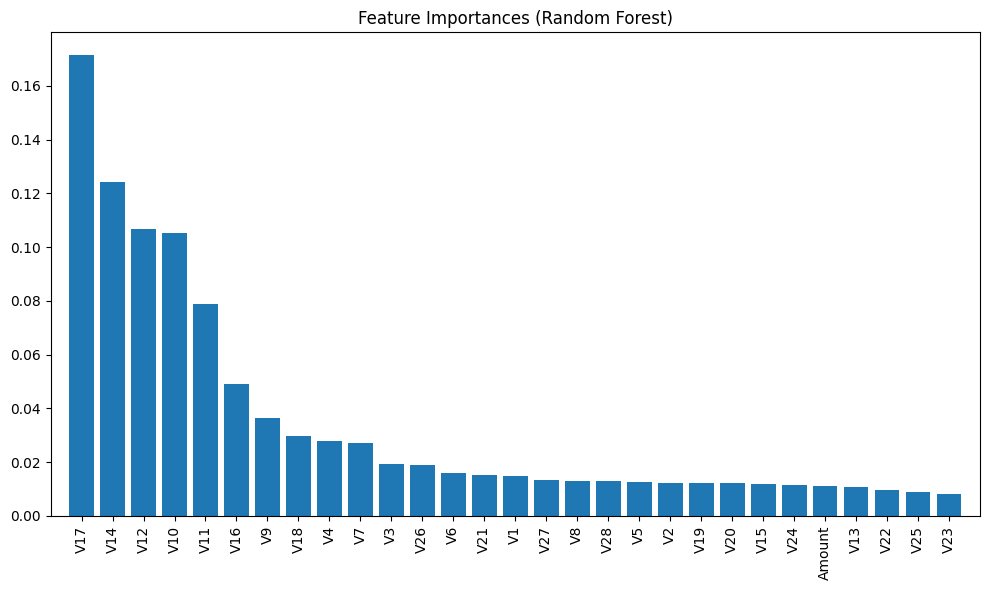

In [ ]:

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

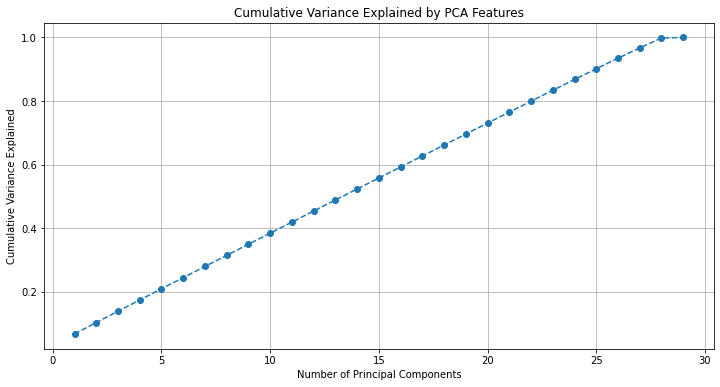

In [ ]:
from sklearn.decomposition import PCA

# Perform PCA (no need to re-standardize if they are already PCA features)
pca = PCA()
pca.fit(X_scaled)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot cumulative variance explained
plt.figure(figsize=(12, 6))
plt.title("Cumulative Variance Explained by PCA Features")
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance Explained")
plt.grid(True)
plt.show()



### Observations

If we aim to capture 95% of the variance, which the plot shows can be achieved with around 20 principal components. However, due to the significant imbalance in the dataset, removing any features may cause us to miss important nuances in identifying the minority class. Therefore, we've decided not to remove any features.

## **Model Building**
- Build different models on the imbalanced dataset and see the result

### **Splitting the data into train & test data**

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X_scaled, y, test_size=0.2, random_state=100, stratify=y)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [ ]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

473
378
95


## **Algorithm Evaluation and Selection**
<style>
  table {
    font-size: 30px;
  }
</style>

| Algorithm           | Pros                                              | Cons                                                    | Recommendation                         |
|---------------------|---------------------------------------------------|---------------------------------------------------------|----------------------------------------|
| KNN                 | Simple, intuitive                                 | Struggles with imbalanced data; computationally expensive | Not ideal                              |
| SVM                 | Robust in high-dimensional spaces; handles class imbalance well | Slow with large datasets; kernel methods computationally intensive | Use Linear SVM with class weights      |
| Decision Tree       | Simple, interpretable                             | Prone to overfitting; requires class weight balancing     | Use as baseline                        |
| Random Forest       | Robust to overfitting; handles imbalance well     | Resource-intensive                                       | Strong candidate                       |
| XGBoost             | Effective with imbalance using “scale_pos_weight”; optimized for large datasets | Computationally intensive                                | Excellent choice                       |
| Logistic Regression | Simple, interpretable; works well with large datasets when class weights are balanced | May underperform without balancing                       | Suitable with class weighting          |


Selected models: **Random Forest, XGBoost, Logistic Regression.**


### Strategy
We are using K-fold cross validation. Averaging the results over K iterations provides a more stable and reliable performance metric.

-**Stratified Splits**: Ensure train and test sets preserve the class distribution.

-**K-Fold Cross-Validation (k=5)**: Balances computational cost with data utilization, ensuring sufficient representation of minority class.


## Evaluation Metric
*Why Threshold-Dependent Metrics Fail:*

- **Accuracy:** Misleading in imbalanced datasets; high scores can mask poor fraud detection.
- **Precision & Recall:** Individually insufficient; precision ignores false negatives, while recall ignores false positives.
-	**F1 Score:** Balances precision and recall but doesn’t fully capture the minority class performance.

*Recommended Metric:*
-	**AUC-ROC:** Measures the model’s ability to distinguish between classes across thresholds, offering a robust evaluation for imbalanced datasets.


In [ ]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import roc_auc_score, make_scorer

def model_evaluation(X, y, n_splits=5):

    # Initialize Stratified K-Fold and scorer
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    scoring = make_scorer(roc_auc_score, needs_proba=True)

    # Define models and hyperparameter grids
    param_grid_rf = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'class_weight': ['balanced', 'balanced_subsample']
    }

    param_grid_xgb = {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'scale_pos_weight': [(sum(y == 0) / sum(y == 1))]
    }

    param_grid_lr = {
        'C': [0.1, 1, 10],
        'class_weight': ['balanced']
    }

    models = {
        'RandomForest': (RandomForestClassifier(random_state=42), param_grid_rf),
        'XGBoost': (xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), param_grid_xgb),
        'LogisticRegression': (LogisticRegression(solver='liblinear', random_state=42), param_grid_lr)
    }

    results = {}

    for name, (model, param_grid) in models.items():
        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grid,
            cv=skf,
            scoring=scoring,
            n_jobs=-1
        )
        grid_search.fit(X, y)
        best_score = grid_search.best_score_
        best_params = grid_search.best_params_
        results[name] = {'Best Score': best_score, 'Best Params': best_params}
        print(f'{name} Best AUC-ROC Score: {best_score}')
        print(f'{name} Best Hyperparameters: {best_params}\n')

    return results

results = model_evaluation(X_train, y_train)
print(results)


RandomForest Best AUC-ROC Score: 0.9766836379895016
RandomForest Best Hyperparameters: {'class_weight': 'balanced', 'max_depth': 10, 'n_estimators': 200}



/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


XGBoost Best AUC-ROC Score: 0.9771974431334293
XGBoost Best Hyperparameters: {'max_depth': 7, 'n_estimators': 50, 'scale_pos_weight': 599.4708994708994}

LogisticRegression Best AUC-ROC Score: 0.9754748865765472
LogisticRegression Best Hyperparameters: {'C': 0.1, 'class_weight': 'balanced'}

{'RandomForest': {'Best Score': 0.9766836379895016, 'Best Params': {'class_weight': 'balanced', 'max_depth': 10, 'n_estimators': 200}}, 'XGBoost': {'Best Score': 0.9771974431334293, 'Best Params': {'max_depth': 7, 'n_estimators': 50, 'scale_pos_weight': 599.4708994708994}}, 'LogisticRegression': {'Best Score': 0.9754748865765472, 'Best Params': {'C': 0.1, 'class_weight': 'balanced'}}}


In [ ]:
#print the optimum value of hyperparameters
results

{'RandomForest': {'Best Score': 0.9766836379895016,
  'Best Params': {'class_weight': 'balanced',
   'max_depth': 10,
   'n_estimators': 200}},
 'XGBoost': {'Best Score': 0.9771974431334293,
  'Best Params': {'max_depth': 7,
   'n_estimators': 50,
   'scale_pos_weight': 599.4708994708994}},
 'LogisticRegression': {'Best Score': 0.9754748865765472,
  'Best Params': {'C': 0.1, 'class_weight': 'balanced'}}}

<style>
  table {
    font-size: 100px;
  }
</style>

| Model               | Hyperparameters                                               | AUC-ROC (Train) |
|---------------------|---------------------------------------------------------------|-----------------|
| Random Forest       | {'class_weight': 'balanced', max_depth: 10, n_estimators: 200} | 0.9767          |
| XGBoost             | {'max_depth': 7, n_estimators: 50, scale_pos_weight: 599.47}  | 0.9772          |
| Logistic Regression | {'C': 0.1, class_weight: 'balanced'}                          | 0.9755          |



#### Proceed with the model which shows the best result
- Apply the best hyperparameter on the model
- Save the model do that it can be loaded in future
- Predict on the test dataset

In [ ]:
import joblib # For saving and loading the model
#  best hyperparameters obtained from GridSearchCV
best_params =  {
        'n_estimators': 50,
        'max_depth': 7,
        'scale_pos_weight': (sum(y_train == 0) / sum(y_train == 1))
    }

# Initialize the final model
model_before_oversampling = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, **best_params)

# Train the final model on the entire training set
model_before_oversampling.fit(X_train, y_train)
joblib.dump(model_before_oversampling, 'model_before_oversampling.pkl')
print("Final model saved successfully.")


Final model saved successfully.


In [ ]:
# Load the saved model
final_model = joblib.load('model_before_oversampling.pkl')

# Make predictions on the test set
y_pred_test = final_model.predict(X_test)
y_pred_proba_test = final_model.predict_proba(X_test)[:, 1]

# Evaluate the model using AUC-ROC
test_auc_roc = roc_auc_score(y_test, y_pred_proba_test)
print(f'Test AUC-ROC Score: {test_auc_roc}')


Test AUC-ROC Score: 0.9746312073210387


### Observation

The top-performing model is XGBoost, achieving a ROC-AUC score of 0.977 on the training data. When we used this model to make predictions on the test set, we obtained an ROC-AUC score of 0.9746, which is comparable and a solid result.

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 14
2nd Top var = 4
3rd Top var = 12


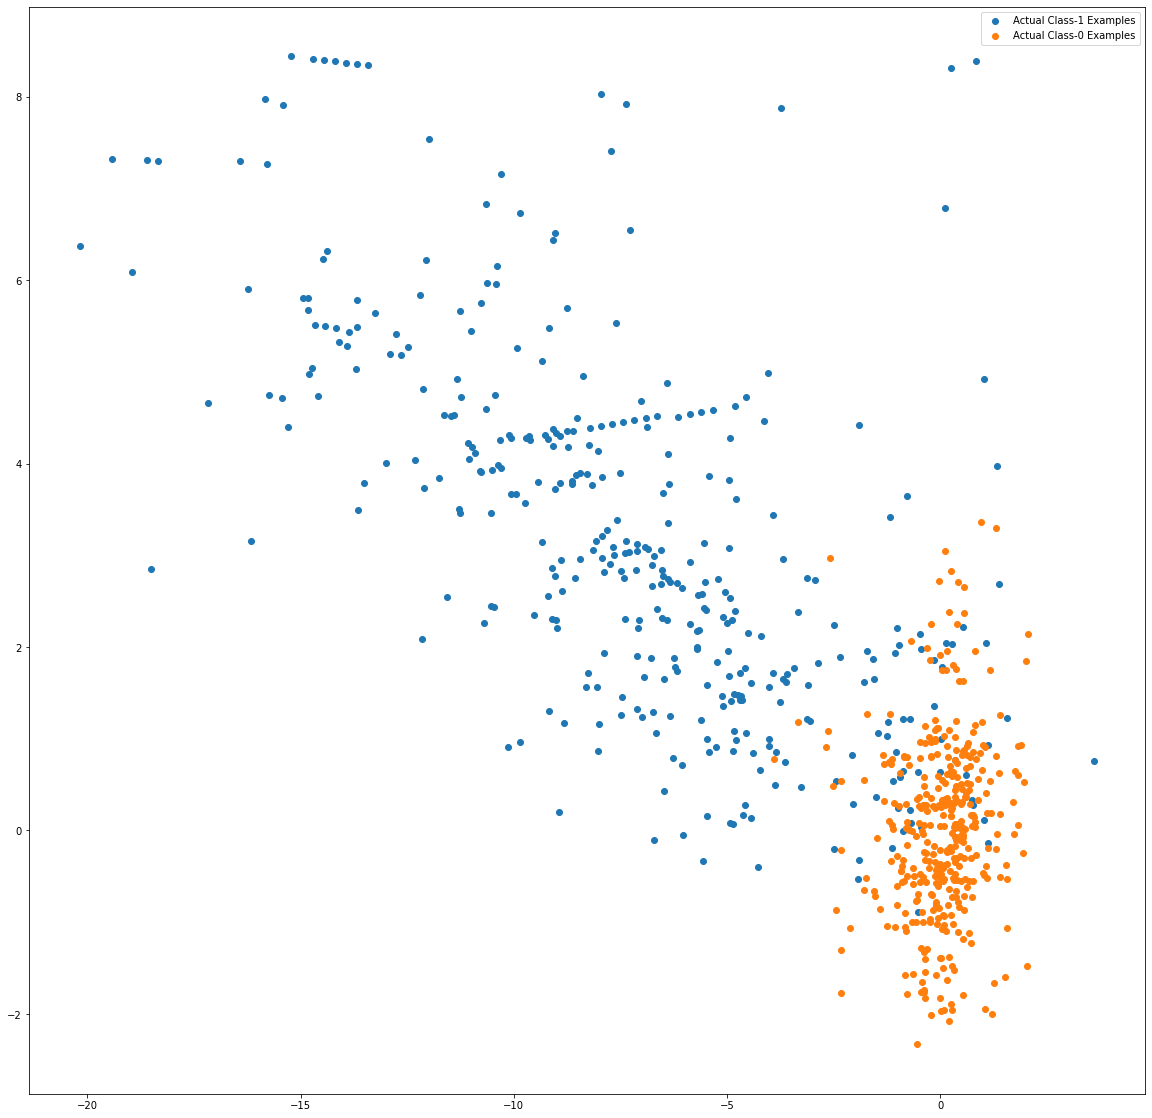

In [ ]:
var_imp = []
for i in final_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(final_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(final_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(final_model.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(final_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(final_model.feature_importances_)[-2])

X_train_1 = X_train[np.where(y_train==1.0)]
X_train_0 = X_train[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

# import matplotlib.pyplot as plt
# %matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()
plt.show()

## Model building with balancing Classes unsing **Oversampling** techniques

##### Perform class balancing with :
- **Random Oversampling**
- **SMOTE**
- **ADASYN**

## **Random Oversampling**

In [ ]:
!pip install scikit-learn

You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [ ]:
!pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.12.4-py3-none-any.whl (258 kB)
  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Using cached scikit_learn-1.3.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.1 MB)
  Using cached scipy-1.10.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.5 MB)
  Using cached numpy-1.24.4-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.4
    Uninstalling numpy-1.19.4:
      Successfully uninstalled numpy-1.19.4
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-lear

## Model Building
- Build different models on the balanced dataset and see the result
- modifying the hyperparameters based on the results from previous models

In [ ]:

def refined_model_evaluation(X, y, n_splits=5):

    # Initialize Stratified K-Fold and scorer
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    scoring = make_scorer(roc_auc_score, needs_proba=True)

    # Define refined models and hyperparameter grids
    param_grid_rf = {
        'n_estimators': [200, 250, 300],  # Increased upper limit
        'max_depth': [10, 15, 20],  # Additional depths
        'class_weight': ['balanced']
    }

    param_grid_xgb = {
        'n_estimators': [50, 70, 100],  # Increased upper limit
        'max_depth': [7, 8, 9],  # Additional depths
        'scale_pos_weight': [(sum(y == 0) / sum(y == 1))]  # Fine-tuning around the best value
    }

    param_grid_lr = {
        'C': [0.05, 0.1, 0.5],  # Fine-tuning around best value
        'class_weight': ['balanced']
    }

    models = {
        'RandomForest': (RandomForestClassifier(random_state=42), param_grid_rf),
        'XGBoost': (xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), param_grid_xgb),
        'LogisticRegression': (LogisticRegression(solver='liblinear', random_state=42), param_grid_lr)
    }

    results = {}
    timings = {}

    for name, (model, param_grid) in models.items():
        start_time = time.time()  # Start timer
        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grid,
            cv=skf,
            scoring=scoring,
            n_jobs=-1
        )
        grid_search.fit(X, y)
        end_time = time.time()  # End timer
        elapsed_time = end_time - start_time

        best_score = grid_search.best_score_
        best_params = grid_search.best_params_
        results[name] = {'Best Score': best_score, 'Best Params': best_params}
        timings[name] = elapsed_time
        print(f'{name} Best AUC-ROC Score: {best_score}')
        print(f'{name} Best Hyperparameters: {best_params}\n')
        print(f'{name} Training Time: {elapsed_time} seconds\n')

    return results,timings


In [ ]:
from imblearn.over_sampling import RandomOverSampler #- import the packages
# Initialize RandomOverSampler
ros = RandomOverSampler(random_state=42)
# Resample the training data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

In [ ]:
y_train_resampled.value_counts()

1    226600
0    226600
Name: Class, dtype: int64

In [ ]:
random_oversampler_results, timings  = refined_model_evaluation(X_train_resampled, y_train_resampled)
print(random_oversampler_results)
timings

RandomForest Best AUC-ROC Score: 1.0
RandomForest Best Hyperparameters: {'class_weight': 'balanced', 'max_depth': 20, 'n_estimators': 200}

RandomForest Training Time: 3894.786039352417 seconds



SystemError: initialization of _internal failed without raising an exception

In [ ]:

def refined_model_evaluation(X, y, n_splits=5):

    # Initialize Stratified K-Fold and scorer
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    scoring = make_scorer(roc_auc_score, needs_proba=True)

    # Define refined models and hyperparameter grids

    param_grid_xgb = {
        'n_estimators': [50, 70, 100],  # Increased upper limit
        'max_depth': [7, 8, 9]  # Additional depths
    }

    param_grid_lr = {
        'C': [0.05, 0.1, 0.5]  # Fine-tuning around best value
    }

    models = {
        'XGBoost': (xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), param_grid_xgb),
        'LogisticRegression': (LogisticRegression(solver='liblinear', random_state=42), param_grid_lr)
    }

    results = {}
    timings = {}

    for name, (model, param_grid) in models.items():
        start_time = time.time()  # Start timer
        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grid,
            cv=skf,
            scoring=scoring,
            n_jobs=-1
        )
        grid_search.fit(X, y)
        end_time = time.time()  # End timer
        elapsed_time = end_time - start_time

        best_score = grid_search.best_score_
        best_params = grid_search.best_params_
        results[name] = {'Best Score': best_score, 'Best Params': best_params}
        timings[name] = elapsed_time
        print(f'{name} Best AUC-ROC Score: {best_score}')
        print(f'{name} Best Hyperparameters: {best_params}\n')
        print(f'{name} Training Time: {elapsed_time} seconds\n')

    return results,timings


In [ ]:
random_oversampler_results, timings  = refined_model_evaluation(X_train_resampled, y_train_resampled)
print(random_oversampler_results)
timings

XGBoost Best AUC-ROC Score: nan
XGBoost Best Hyperparameters: {'max_depth': 7, 'n_estimators': 50}

XGBoost Training Time: 1350.3861269950867 seconds

LogisticRegression Best AUC-ROC Score: 0.9862525896069844
LogisticRegression Best Hyperparameters: {'C': 0.5}

LogisticRegression Training Time: 26.62443232536316 seconds

{'XGBoost': {'Best Score': nan, 'Best Params': {'max_depth': 7, 'n_estimators': 50}}, 'LogisticRegression': {'Best Score': 0.9862525896069844, 'Best Params': {'C': 0.5}}}


{'XGBoost': 1350.3861269950867, 'LogisticRegression': 26.62443232536316}

In [ ]:
import joblib # For saving and loading the model
# Example best hyperparameters obtained from GridSearchCV (Replace these with your best params)
best_params = {'class_weight': 'balanced', 'max_depth': 20, 'n_estimators': 200}

# Initialize the final model
model_random_oversampling = RandomForestClassifier(random_state=42, **best_params)

# Train the final model on the entire training set
model_random_oversampling.fit(X_train_resampled, y_train_resampled)
joblib.dump(model_random_oversampling, 'model_random_oversampling.pkl')
print("Final model saved successfully.")

# Load the saved model
final_model = joblib.load('model_random_oversampling.pkl')

# Make predictions on the test set
y_pred_test = final_model.predict(X_test)
y_pred_proba_test = final_model.predict_proba(X_test)[:, 1]

# Evaluate the model using AUC-ROC
test_auc_roc = roc_auc_score(y_test, y_pred_proba_test)
print(f'Test AUC-ROC Score: {test_auc_roc}')


Final model saved successfully.
Test AUC-ROC Score: 0.979324383332559


### Observations

Fitted the random oversampler on train set and after resampling there is a 50-50 distribution between the classes.we have also added code to track the training time for each model.

| Model Name          | Best Hyper Parameters                                         | Best AUC-ROC Score | Training Time         |
|---------------------|---------------------------------------------------------------|--------------------|-----------------------|
| RandomForest        | {'class_weight': 'balanced', 'max_depth': 20, 'n_estimators': 200} | 1.0                | 3894.78603     |
| XGBoost             | {'max_depth': 7, 'n_estimators': 50}                          | nan                | 1350.3861    |
| LogisticRegression  | {'C': 0.5}                                                    | 0.98625 | 26.6244323    |

The RandomForest model has achieved a perfect AUC-ROC score of 1, which indicates flawless distinction between fraudulent and non-fraudulent transactions. However, such a result is unusual and may suggest overfitting. When we used this model to predict on the test set, we obtained an AUC-ROC score of 0.9793.

## **SMOTE technique**
SMOTE is used to address the class imbalance problem by generating synthetic samples of the minority class. It creates synthetic samples by interpolating between existing minority class samples. This helps in making the decision boundaries for the minority class more generalizable.

Given that the training time for **Logistic Regression** is considerably shorter than the other models we tried, and its evaluation score is commendable, we proceed with building more models using diverse hyperparameters to further improve the score.

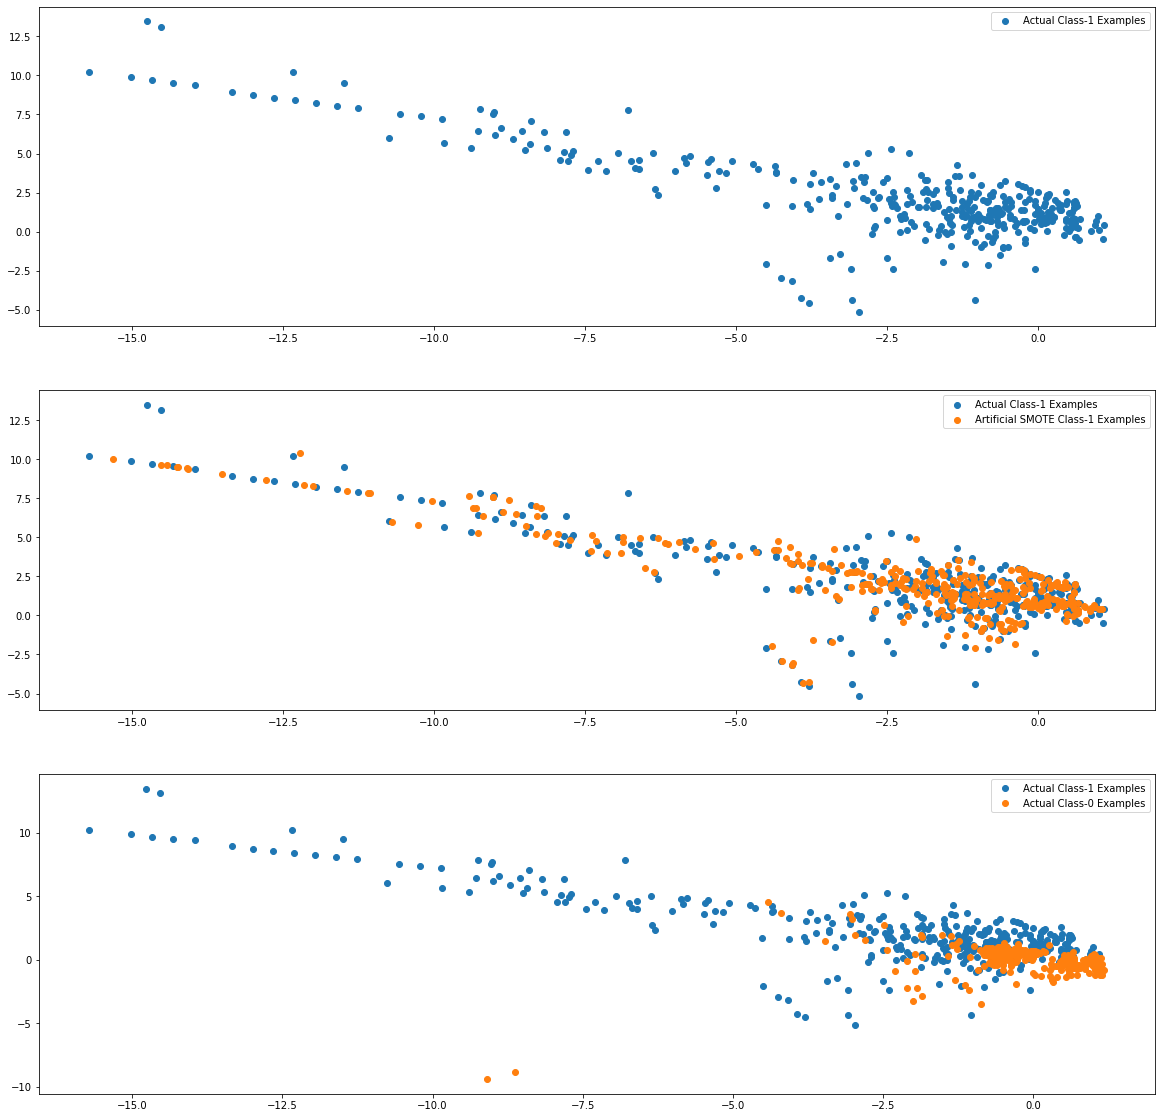

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train[np.where(y_train==1.0)]
X_train_0 = X_train[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
import warnings
warnings.filterwarnings("ignore")
def logistic_regression_model_evaluation(X, y, n_splits=5):

    # Initialize Stratified K-Fold and scorer
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    scoring = make_scorer(roc_auc_score, needs_proba=True)

    param_grid_lr = {
        'C': [0.01, 0.05, 0.1, 0.5, 1.0],
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'solver': ['liblinear', 'saga'],
        'max_iter': [100, 200, 300]
    }

    results = {}
    timings = {}

    start_time = time.time()  # Start timer
    grid_search = GridSearchCV(
        estimator=LogisticRegression(random_state=42),
        param_grid=param_grid_lr,
        cv=skf,
        scoring=scoring,
        n_jobs=-1
    )
    grid_search.fit(X, y)
    end_time = time.time()  # End timer
    elapsed_time = end_time - start_time

    best_score = grid_search.best_score_
    best_params = grid_search.best_params_
    results['Logistic Regression'] = {'Best Score': best_score, 'Best Params': best_params}
    timings['Logistic Regression'] = elapsed_time

    print(f'Logistic Regression Best AUC-ROC Score: {best_score}')
    print(f'Logistic Regression Best Hyperparameters: {best_params}')
    print(f'Logistic Regression Training Time: {elapsed_time} seconds\n')

    return results, timings


In [ ]:
smote_results, smote_timings = logistic_regression_model_evaluation(X_train_smote, y_train_smote)
print(smote_results)
smote_timings

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:118

Logistic Regression Best AUC-ROC Score: 0.988628927791311
Logistic Regression Best Hyperparameters: {'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Logistic Regression Training Time: 1774.9560732841492 seconds

{'Logistic Regression': {'Best Score': 0.988628927791311, 'Best Params': {'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}}}


{'Logistic Regression': 1774.9560732841492}

In [ ]:
#  best hyperparameters obtained from GridSearchCV
best_params = {'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}

# Initialize the final model
model_smote_oversampling = LogisticRegression(random_state=42, **best_params)

# Train the final model on the entire training set
model_smote_oversampling.fit(X_train_smote, y_train_smote)
joblib.dump(model_smote_oversampling, 'model_smote_oversampling.pkl')
print("Final model saved successfully.")

# Load the saved model
final_model = joblib.load('model_smote_oversampling.pkl')

# Make predictions on the test set
y_pred_test = final_model.predict(X_test)
y_pred_proba_test = final_model.predict_proba(X_test)[:, 1]

# Evaluate the model using AUC-ROC
test_auc_roc = roc_auc_score(y_test, y_pred_proba_test)
print(f'Test AUC-ROC Score: {test_auc_roc}')


Final model saved successfully.
Test AUC-ROC Score: 0.9802339387745622


### Observations

Logistic Regression Model Performance after training on SMOTE dataset

- **Best AUC-ROC Score**: 0.9886
- **Best Hyperparameters**:
  - `C`: 1.0
  - `max_iter`: 100
  - `penalty`: 'l2'
  - `solver`: 'liblinear'
- **Training Time**: 1774.9561 seconds
- **Test AUC-ROC Score**: 0.9802


## **ADASYN technique**

ADASYN is another oversampling technique aimed at addressing class imbalances, but it focuses more on adaptive learning. ADASYN generates synthetic samples similar to SMOTE but with a twist: it generates more synthetic samples for minority class instances that are harder to classify (closer to the decision boundary). This adaptive approach helps in focusing on the difficult-to-classify regions of the minority class, leading to a more balanced and potentially more robust classifier.

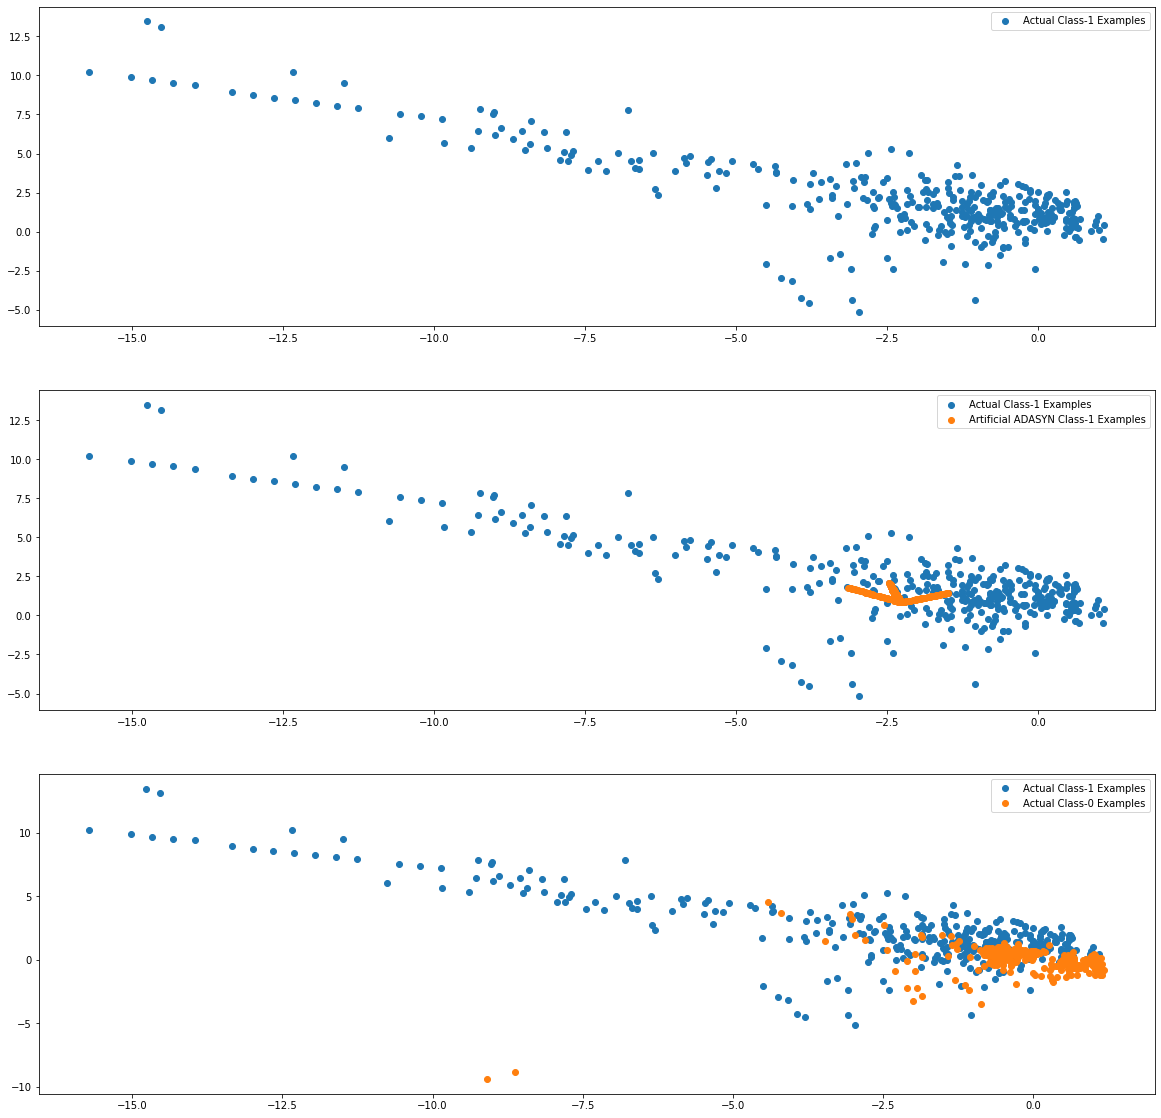

In [ ]:
from imblearn.over_sampling import ADASYN
import warnings
warnings.filterwarnings("ignore")

ada = ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train[np.where(y_train==1.0)]
X_train_0 = X_train[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
y_train_adasyn.value_counts()

1    226620
0    226600
Name: Class, dtype: int64

In [ ]:

import warnings
warnings.filterwarnings("ignore")
adasyn_results, adasyn_timings = logistic_regression_model_evaluation(X_train_adasyn, y_train_adasyn)
print(adasyn_results)
adasyn_timings

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:118

Logistic Regression Best AUC-ROC Score: 0.9590921710161291
Logistic Regression Best Hyperparameters: {'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Logistic Regression Training Time: 2056.857583761215 seconds

{'Logistic Regression': {'Best Score': 0.9590921710161291, 'Best Params': {'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}}}


{'Logistic Regression': 2056.857583761215}

In [ ]:
# Example best hyperparameters obtained from GridSearchCV (Replace these with your best params)
best_params = {'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}

# Initialize the final model
model_adasyn_oversampling = LogisticRegression(random_state=42, **best_params)

# Train the final model on the entire training set
model_adasyn_oversampling.fit(X_train_adasyn, y_train_adasyn)
joblib.dump(model_adasyn_oversampling, 'model_adasyn_oversampling.pkl')
print("Final model saved successfully.")

# Load the saved model
final_model = joblib.load('model_adasyn_oversampling.pkl')

# Make predictions on the test set
y_pred_test = final_model.predict(X_test)
y_pred_proba_test = final_model.predict_proba(X_test)[:, 1]

# Evaluate the model using AUC-ROC
test_auc_roc = roc_auc_score(y_test, y_pred_proba_test)
print(f'Test AUC-ROC Score: {test_auc_roc}')


Final model saved successfully.
Test AUC-ROC Score: 0.983358201328564


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means th

### Observations

 Logistic Regression Model Performance trained on ADASYN dataset

- **Best AUC-ROC Score**: 0.9591
- **Best Hyperparameters**:
  - `C`: 1.0
  - `max_iter`: 100
  - `penalty`: 'l2'
  - `solver`: 'liblinear'
- **Training Time**: 2056.8576 seconds
- **Test AUC-ROC Score**: 0.9834


## **Overview of best models**

| Oversampling Technique | Model Name         | Best Hyperparameters                                                         | Best Train AUC-ROC Score | Best Test AUC-ROC Score | Training Time          |
|------------------------|--------------------|-----------------------------------------------------------------------------|--------------------------|-------------------------|------------------------|
| None                   | XGBoost            | {'max_depth': 7, 'n_estimators': 50, 'scale_pos_weight': 599.4708994708994}  | 0.9771             | 0.9746      |                        |
| Random oversampling    | RandomForest       | {'class_weight': 'balanced', 'max_depth': 20, 'n_estimators': 200}           | 1.0                      | 0.9793       | 3894.7860      |
| SMOTE                  | LogisticRegression | {'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}           | 0.9886        | 0.9802      | 1774.9560     |
| Adasyn                 | LogisticRegression | {'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}           | 0.9590       | 0.9833       | 2056.8575      |


### Reload best model and find optimal threshold
Logistic Regression with ADASYN provided the best balance of performance (AUC-ROC: 0.9834) and computational efficiency.

In [9]:
import joblib
# Load the saved model
final_model = joblib.load('/content/drive/MyDrive/Colab Notebooks/model_adasyn_oversampling.pkl')


In [12]:
# Make predictions on the test set
y_pred_test = final_model.predict(X_test)
y_pred_proba_test = final_model.predict_proba(X_test)[:, 1]

# Evaluate the model using AUC-ROC
test_auc_roc = roc_auc_score(y_test, y_pred_proba_test)
print(f'Test AUC-ROC Score: {test_auc_roc}')

Test AUC-ROC Score: 0.983358201328564


In [13]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_test)

# Find the threshold that maximizes the distance to the line y=x
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold}")

Optimal Threshold: 0.8518463109949622


## **Conclusion**

Logistic Regression with ADASYN provided the best balance of performance (AUC-ROC: 0.9834) and computational efficiency.

Depending on your computational resources and aiming for the best performance, the model selection can vary:

If you have significant compute power at your disposal, you can experiment with ensemble models like Random Forest or XGBoost. These models typically perform well but might require more processing power. Additionally, the quality of your dataset plays a crucial role. The more examples and diverse scenarios you have of fraudulent cases, the better your model will become over time as it learns from these examples.